## Punto 1 – Modelli supervisionati: Decision Tree e Neural Network

### Teoria

### Cos'è l’apprendimento supervisionato

L’apprendimento supervisionato è un paradigma di Machine Learning in cui il modello impara a prevedere un'etichetta (o valore) a partire da input noti, utilizzando un dataset **etichettato**. Ogni riga del dataset contiene un input (feature) e un output noto (target).

Nel nostro caso:

* **Input**: orario, giorno della settimana, temperatura, ecc.
* **Output**: valore di consumo energetico (regressione) o classe di consumo alto/basso (classificazione)

### Decision Tree

I Decision Tree sono modelli ad albero che dividono lo spazio dei dati in modo gerarchico. Ogni nodo rappresenta una decisione basata su una soglia di una feature, fino a raggiungere una previsione in una foglia.

**Vantaggi**:

* Interpretabilità elevata
* Supporta sia classificazione che regressione
* Funziona con feature numeriche e categoriche

**Svantaggi**:

* Sensibile a piccole variazioni nei dati (overfitting)
* Generalmente meno performante dei modelli ensemble (Random Forest, XGBoost)

### Neural Network (Multilayer Perceptron)

Le Reti Neurali, in particolare le MLP (Multilayer Perceptron), sono modelli non lineari composti da strati di neuroni artificiali. Sono capaci di modellare relazioni molto complesse nei dati.

**Vantaggi**:

* Estremamente flessibili
* Adatti a pattern non lineari
* Buoni per grandi dataset

**Svantaggi**:

* Poco interpretabili
* Richiedono più dati e più risorse computazionali
* Più sensibili alla scelta degli iperparametri

---

### Applicazione pratica con il dataset Kaggle Hourly Energy Consumption

#### Obiettivo

Classificare ogni ora come “alto consumo” o “basso consumo” rispetto alla media giornaliera, settimanale o globale.



In [5]:
# #### Setup iniziale
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# #### Caricamento del dataset
# Kaggle "AEP_hourly": columns => ["Datetime", "AEP_MW"]
df = pd.read_csv("AEP_hourly.csv", parse_dates=["Datetime"])

# Feature engineering
df["hour"] = df["Datetime"].dt.hour
df["dayofweek"] = df["Datetime"].dt.dayofweek
df["month"] = df["Datetime"].dt.month

# Target binario: 1 se consumo sopra la mediana
df["target"] = (df["AEP_MW"] > df["AEP_MW"].median()).astype(int)

# #### Selezione delle feature
X = df[["hour", "dayofweek", "month"]]
y = df["target"]

# #### Split del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

# #### Modello 1 – Decision Tree
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, y_pred_tree, digits=3))

# #### Modello 2 – Neural Network (MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("Neural Network:")
print(classification_report(y_test, y_pred_mlp, digits=3))


Decision Tree:
              precision    recall  f1-score   support

           0      0.789     0.749     0.768     15161
           1      0.761     0.800     0.780     15158

    accuracy                          0.774     30319
   macro avg      0.775     0.774     0.774     30319
weighted avg      0.775     0.774     0.774     30319

Neural Network:
              precision    recall  f1-score   support

           0      0.846     0.748     0.794     15161
           1      0.774     0.863     0.816     15158

    accuracy                          0.806     30319
   macro avg      0.810     0.806     0.805     30319
weighted avg      0.810     0.806     0.805     30319



### Confronto e valutazione

* Il **Decision Tree** è interpretabile: puoi visualizzarlo con `plot_tree`.
* L’**MLP** ha probabilmente maggiore accuratezza ma è una “black box”.

---



## **1. Struttura del report**

Il report di classificazione mostra **metriche** per ciascuna classe (`0` e `1`) e valori aggregati (**accuracy**, **macro avg**, **weighted avg**).

Nel tuo caso:

* `0` = consumo **basso** (sotto la mediana di AEP\_MW)
* `1` = consumo **alto** (sopra la mediana)

---

## **2. Metriche principali per classe**

### **Precision**

Formula:

$$
\text{Precision} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}
$$

Significa: **Quando il modello predice questa classe, quante volte ha ragione?**

* Classe `0`: **0.789** → quando il modello dice “basso consumo”, ha ragione il 78,9% delle volte.
* Classe `1`: **0.761** → quando il modello dice “alto consumo”, ha ragione il 76,1% delle volte.

---

### **Recall**

Formula:

$$
\text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}
$$

Significa: **Tra tutti i veri esempi di questa classe, quanti ne ha riconosciuti correttamente?**

* Classe `0`: **0.749** → il modello riconosce correttamente il 74,9% di tutti i casi di basso consumo.
* Classe `1`: **0.800** → il modello riconosce correttamente l’80,0% di tutti i casi di alto consumo.

---

### **F1-score**

Formula:

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Significa: **Media armonica di precision e recall** → utile quando le classi sono bilanciate o quando vogliamo un compromesso tra i due.

* Classe `0`: **0.768** → buon equilibrio tra precision (78,9%) e recall (74,9%).
* Classe `1`: **0.780** → leggermente migliore di `0`, soprattutto grazie a un recall più alto.

---

### **Support**

È il numero di **casi reali** di quella classe nel test set.

* Classe `0`: **15.161 campioni**
* Classe `1`: **15.158 campioni**

Qui le classi sono perfettamente bilanciate (buono per l’interpretazione delle metriche).

---

## **3. Metriche complessive**

### **Accuracy**

Formula:

$$
\text{Accuracy} = \frac{\text{Predizioni corrette}}{\text{Totale campioni}}
$$

* **0.774** → il 77,4% delle previsioni totali è corretto.
  È una metrica globale ma non sempre affidabile se le classi sono squilibrate (qui invece sono bilanciate, quindi va bene).

---

### **Macro avg**

* Media semplice tra le metriche delle due classi (ogni classe pesa uguale).
* **Precision = 0.775**, **Recall = 0.774**, **F1 = 0.774**
  → indica che le prestazioni sono abbastanza uniformi tra le classi.

---

### **Weighted avg**

* Media pesata in base al numero di campioni per classe.
* Qui coincide quasi con la macro avg perché le classi hanno lo stesso numero di esempi.

---

## **4. Come interpretare il tuo modello**

* **Equilibrio**: le prestazioni tra classi sono simili (nessuna classe trascurata).
* **Recall leggermente più alto su classe `1`**: il modello tende a riconoscere un po’ meglio i consumi alti, ma a costo di perdere un po’ di precisione.
* **F1-score** vicino a 0.78 per entrambe → buon compromesso tra evitare falsi allarmi e non perdere casi reali.
* **Accuracy** del 77% → discreta per un modello con feature così semplici (`hour`, `dayofweek`, `month`).

---


Decision Tree:
              precision    recall  f1-score   support

           0      0.789     0.749     0.768     15161
           1      0.761     0.800     0.780     15158

    accuracy                          0.774     30319
   macro avg      0.775     0.774     0.774     30319
weighted avg      0.775     0.774     0.774     30319



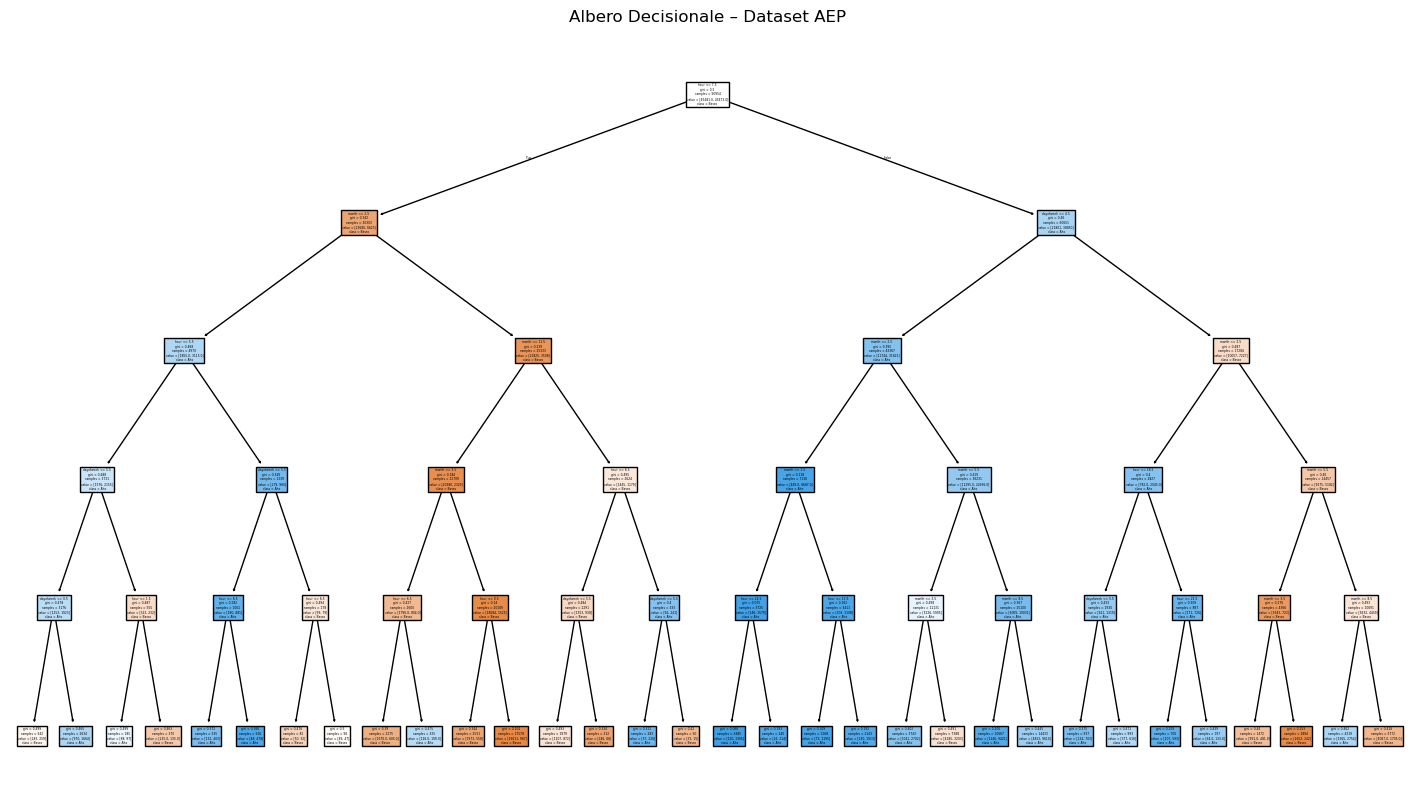

Neural Network:
              precision    recall  f1-score   support

           0      0.846     0.748     0.794     15161
           1      0.774     0.863     0.816     15158

    accuracy                          0.806     30319
   macro avg      0.810     0.806     0.805     30319
weighted avg      0.810     0.806     0.805     30319



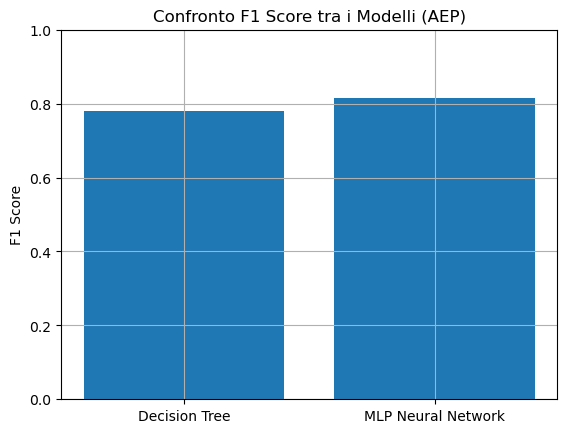

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score

# Caricamento dataset AEP: colonne = ["Datetime", "AEP_MW"]
df = pd.read_csv("AEP_hourly.csv", parse_dates=["Datetime"])

# Feature engineering
df["hour"] = df["Datetime"].dt.hour
df["dayofweek"] = df["Datetime"].dt.dayofweek
df["month"] = df["Datetime"].dt.month

# Target binario: 1 se consumo sopra la mediana
df["target"] = (df["AEP_MW"] > df["AEP_MW"].median()).astype(int)

# Selezione feature e target + split
X = df[["hour", "dayofweek", "month"]]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

# -------------------------
# Modello 1 – Decision Tree
# -------------------------
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, y_pred_tree, digits=3))

# Visualizzazione albero decisionale (figura dedicata)
plt.figure(figsize=(18, 10))
plot_tree(tree, feature_names=X.columns, class_names=["Basso", "Alto"], filled=True)
plt.title("Albero Decisionale – Dataset AEP")
plt.show()

# -------------------------
# Modello 2 – MLPClassifier
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("Neural Network:")
print(classification_report(y_test, y_pred_mlp, digits=3))

# -------------------------
# Confronto F1-score
# -------------------------
f1_tree = f1_score(y_test, y_pred_tree)
f1_mlp = f1_score(y_test, y_pred_mlp)

plt.figure()
plt.bar(["Decision Tree", "MLP Neural Network"], [f1_tree, f1_mlp])
plt.ylabel("F1 Score")
plt.title("Confronto F1 Score tra i Modelli (AEP)")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


## Teoria: Classificazione sbilanciata

### Quando il problema è "sbilanciato"

Un problema di classificazione si definisce **sbilanciato** quando una delle classi è **molto più rappresentata** delle altre. Ad esempio, nel dataset di consumo energetico, potremmo avere:

* 85% delle ore con **basso consumo**
* 15% delle ore con **alto consumo**

Se alleniamo un modello senza tener conto di questo squilibrio, esso potrebbe “imparare” a **prevedere sempre la classe più comune** ottenendo alta accuratezza ma **zero utilità pratica**.

### Perché è un problema

Con dati sbilanciati:

* Un’**alta accuracy** può nascondere un modello inutile (es. 85% di accuratezza semplicemente prevedendo sempre “basso consumo”).
* Le metriche come **precision, recall e F1-score** diventano più importanti.
* Il modello fatica a **generalizzare** per la classe minoritaria (che spesso è la più interessante: frodi, guasti, allarmi...).

---

## Soluzioni: tecniche di sampling

### 1. Undersampling

Si riduce il numero di esempi della classe maggioritaria.

* Vantaggi: semplice, veloce
* Svantaggi: perdita di informazione, rischio di sottofitting

```python
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)
```

---

### 2. Oversampling

Si duplicano o sintetizzano esempi della classe minoritaria.

#### a. Random Oversampling

Duplica esempi esistenti della classe minoritaria.

```python
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
```

#### b. SMOTE (Synthetic Minority Over-sampling Technique)

Genera nuovi esempi sintetici della classe minoritaria tramite interpolazione.

```python
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
```

* Vantaggi: mantiene tutta l’informazione originale
* Svantaggi: può introdurre rumore se le classi si sovrappongono troppo

---

### 3. Class weighting (modelli che accettano `class_weight`)

Alcuni modelli (es. `LogisticRegression`, `RandomForest`, `XGBoost`) permettono di **dare più peso agli errori sulla classe minoritaria**.

```python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
```

Questa opzione è spesso molto efficace e semplice da implementare.

---

## Pratica: gestione dello sbilanciamento nel nostro dataset

### Supponiamo di avere la colonna `target` binaria (0 = basso consumo, 1 = alto consumo)

Verifica dello sbilanciamento:

```python
print(y.value_counts(normalize=True))
```

### Applichiamo SMOTE:

```python
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribuzione post-SMOTE:", y_train_resampled.value_counts())
```

Ora puoi allenare i tuoi modelli con `X_train_resampled` e `y_train_resampled`.

---

## Quando scegliere una tecnica o un’altra

| Situazione                      | Tecnica suggerita                           |
| ------------------------------- | ------------------------------------------- |
| Pochi dati                      | SMOTE o class\_weight                       |
| Tanti dati                      | Undersampling                               |
| Modelli semplici                | class\_weight                               |
| Pipeline complessa con ensemble | SMOTE                                       |
| Dataset rumoroso                | class\_weight (meno rischio di overfitting) |

---


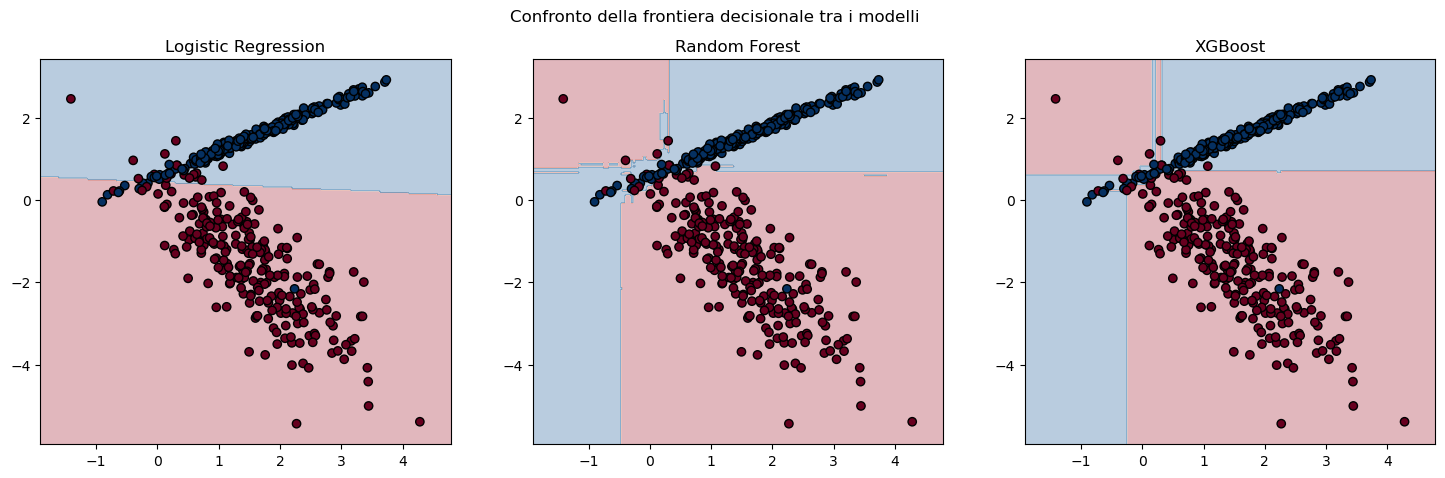

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Generazione dati sintetici per visualizzazione
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=1.5, random_state=42)

# Griglia per il plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Addestramento modelli
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "XGBoost": xgb.XGBClassifier( eval_metric="logloss")
}

# Creazione grafici
plt.figure(figsize=(18, 5))
for idx, (name, model) in enumerate(models.items(), 1):
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, idx)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(name)

plt.suptitle("Confronto della frontiera decisionale tra i modelli")
plt.show()




## 1. Logistic Regression

### Logica matematica

È un modello **lineare di classificazione binaria**. Calcola una **probabilità** che un'osservazione appartenga alla classe 1 tramite la **funzione logistica (sigmoide)**:

$$
P(y = 1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}
$$

Dove:

* $\mathbf{x}$ è il vettore delle feature
* $\mathbf{w}$ i coefficienti (pesano l'importanza delle feature)
* $b$ il termine di bias

L'output è una probabilità, che viene sogliata (di solito a 0.5) per assegnare la classe.

### Frontiera decisionale

* È una **retta** (in 2D) o un **iperpiano** (in n dimensioni).
* Separazione **lineare** tra le classi.

---

## 2. Random Forest

### Logica matematica

È un modello di **ensemble** che costruisce **molti alberi decisionali** su sottocampioni dei dati e ne **media le predizioni**. Ogni albero fa previsioni indipendenti, e la classe finale è scelta per voto di maggioranza.

* Ogni **Decision Tree** segmenta lo spazio delle feature con **soglie** che massimizzano l'omogeneità dei nodi.
* Il Random Forest **riduce overfitting** degli alberi singoli tramite la variabilità introdotta nel campionamento.

### Frontiera decisionale

* **Molto frastagliata e flessibile**, segue la forma dei dati.
* Non lineare, ma a “gradini” perché ogni albero crea regole di soglia.

---

## 3. XGBoost (Extreme Gradient Boosting)

### Logica matematica

Anche XGBoost è un ensemble di alberi, ma li costruisce **in sequenza**. Ogni nuovo albero tenta di **correggere l’errore** fatto dai precedenti, ottimizzando una **funzione obiettivo** tramite il **gradient descent**.

* La predizione finale è la **somma pesata** di tutti gli alberi:

  $$
  \hat{y} = \sum_{t=1}^T f_t(\mathbf{x}), \quad f_t \in \mathcal{F}
  $$
* Dove $f_t$ è il t-esimo albero, e $\mathcal{F}$ è lo spazio di tutte le funzioni (alberi) possibili.

### Frontiera decisionale

* **Molto complessa** e adattabile
* Generalmente più liscia ed efficace del Random Forest

---

## Differenze sintetiche

| Modello             | Lineare | Interpretabile | Overfitting | Richiede tuning | Flessibilità |
| ------------------- | ------- | -------------- | ----------- | --------------- | ------------ |
| Logistic Regression | Sì      | Alta           | Basso       | Basso           | Bassa        |
| Random Forest       | No      | Media          | Medio       | Basso           | Alta         |
| XGBoost             | No      | Bassa          | Medio-Basso | Alto            | Molto alta   |

---

## Cosa mostra il grafico 

Vediamo:

* **Logistic Regression** separa i punti con una **retta pulita**
* **Random Forest** crea zone quadrate o rettangolari (regole a soglia)
* **XGBoost** disegna una frontiera più **curva e complessa**, seguendo meglio i dati

---


## Parte 1 – Ottimizzazione nella Linear Regression (e Logistic Regression)

### Linear Regression: regressione lineare pura

Nel caso della **regressione lineare**, vogliamo trovare i coefficienti $w$ e $b$ (bias) che meglio approssimano il target $y$, in base alle feature $X$, con un modello del tipo:

$$
\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$$

---

### Obiettivo: minimizzare l’errore quadratico medio (MSE)

L’**errore** è dato dalla distanza tra il valore predetto e quello reale:

$$
\text{Errore} = y_i - \hat{y}_i
$$

L’obiettivo è **minimizzare** la **somma dei quadrati degli errori** (per penalizzare maggiormente gli errori grandi):

$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

---

### Ottimizzazione: discesa del gradiente (Gradient Descent)

* Si parte con coefficienti casuali.
* Si calcola il gradiente della funzione di errore rispetto a ciascun coefficiente.
* Si aggiornano i coefficienti nella direzione che **riduce l’errore**.

Formula aggiornamento:

$$
w_j := w_j - \eta \cdot \frac{\partial \text{Loss}}{\partial w_j}
$$

Dove:

* $\eta$ è il **learning rate** (quanto ci si sposta)
* Il gradiente misura l’inclinazione della funzione: da che parte salire o scendere

---

### Logistic Regression

Simile alla regressione lineare, ma il risultato è una **probabilità** ottenuta passando $\hat{y}$ attraverso la funzione sigmoide:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = w^T x + b
$$

La loss da minimizzare è la **log loss** o **binary cross-entropy**:

$$
\text{Loss} = -\frac{1}{n} \sum_{i=1}^n \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

Anche qui si usa **gradient descent** per ottimizzare i pesi.

---

## Parte 2 – Ottimizzazione nei Decision Tree e Random Forest

### Scopo degli alberi

In un **Decision Tree**, si costruisce un albero di decisioni successive. A ogni nodo, il dataset viene **diviso** in base a una soglia su una feature, per ottenere gruppi **più omogenei** possibile.

---

### Criteri di impurità

A ogni divisione (split), si misura **quanto miglioriamo la purezza** dei dati. Due misure comuni:

#### 1. Entropia

L'entropia misura il grado di “disordine” di un insieme:

$$
H(S) = - \sum_{i=1}^C p_i \log_2(p_i)
$$

Dove:

* $C$ è il numero di classi
* $p_i$ è la proporzione di elementi della classe $i$

Se un nodo contiene solo una classe: entropia = 0
Se le classi sono perfettamente bilanciate: entropia massima

---

#### 2. Indice di Gini

Un’altra misura di impurità, più veloce da calcolare:

$$
G(S) = 1 - \sum_{i=1}^C p_i^2
$$

* Gini = 0 → nodo puro
* Gini alto → classi miste

---

### Guida alla costruzione dell’albero (greedy)

1. Per ogni feature e soglia possibile:

   * Dividi il dataset in due sottoinsiemi
   * Calcola la **impurità totale ponderata** dei due rami
2. Scegli il **miglior split**: quello che riduce di più l’impurità (massimo guadagno di informazione)

---

### Random Forest

Il Random Forest costruisce **molti alberi**, ognuno su:

* un **sottoinsieme casuale** dei dati (bagging)
* un **sottoinsieme casuale** delle feature (feature sampling)

Ogni albero è addestrato indipendentemente, con i criteri visti sopra. La predizione finale:

* per classificazione: **maggioranza** delle classi predette
* per regressione: **media** dei valori predetti

---

### Perché funziona

* Gli alberi singoli hanno alta varianza (tendono all’overfitting).
* L’aggregazione di alberi diversi riduce la varianza e **migliora la generalizzazione**.
* Il risultato è un modello più stabile, accurato e robusto.

---


**Split train/validation/test e loro importanza**. Questo passaggio è fondamentale per costruire modelli affidabili, generalizzabili e confrontabili in modo corretto.

---

## Obiettivo

Dividere correttamente il dataset in **insiemi distinti** permette di:

* **allenare** il modello su dati conosciuti
* **ottimizzare** iperparametri e architettura in modo controllato
* **valutare** le performance reali su dati mai visti (test)

---

## Definizioni

| Insieme        | Scopo principale                              |
| -------------- | --------------------------------------------- |
| **Train**      | Allenare il modello                           |
| **Validation** | Scegliere iperparametri e confrontare modelli |
| **Test**       | Valutare il modello finale su dati mai visti  |

---

## Perché è importante?

### 1. Evita l’overfitting sulla metrica

Senza una separazione valida, potresti ottimizzare continuamente il modello su dati già noti, ottenendo buoni risultati **solo per quei dati**, ma scarsi su dati nuovi.

### 2. Permette confronti equi

Il **test set deve rimanere congelato**: non si guarda mai durante il tuning. Serve solo alla fine per dire "quanto è buono il modello finale".

---

## Suddivisione tipica

Una divisione comune è:

* **70% train**
* **15% validation**
* **15% test**

In Python con scikit-learn:

```python
from sklearn.model_selection import train_test_split

# Prima si separa il test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Poi si separa il validation dal resto
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42)
```

> Nota: 0.176 ≈ 15 / 85 per ottenere esattamente 70% / 15% / 15%

---

## Alternative: K-fold cross validation

Quando il dataset è **piccolo**, la divisione in train/val/test può risultare instabile. In questi casi si usa la **K-fold cross-validation**, che vedremo nel dettaglio nel punto dedicato.

---

## Caso reale: dataset Kaggle Hourly Energy Consumption

Supponiamo di voler classificare le ore come **alto** o **basso** consumo.

### Passi:

```python
from sklearn.model_selection import train_test_split

# Etichetta: 1 se consumo > mediana, altrimenti 0
df["target"] = (df["MW"] > df["MW"].median()).astype(int)

# Feature: ora, giorno della settimana, mese
X = df[["hour", "dayofweek", "month"]]
y = df["target"]

# Split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")
```

---

## Conclusione

La corretta divisione dei dati:

* migliora la qualità del modello
* previene il data leakage
* permette tuning e valutazione separati
* è **obbligatoria** in qualsiasi pipeline di Machine Learning affidabile

---




---

## **K-Fold Stratificato & ROC-AUC**

### Teoria

#### K-Fold Cross Validation

Il **K-Fold Cross Validation** è una tecnica per stimare le prestazioni di un modello utilizzando **tutti i dati disponibili** in modo più efficiente rispetto al semplice train/validation/test.

**Procedura standard**:

1. Si divide il dataset in **K parti (folds)** di uguale dimensione.
2. Per ogni iterazione:

   * Si usa **K-1 folds** per l’addestramento.
   * Si usa **1 fold** per la validazione.
3. Si calcola la metrica di valutazione per ogni iterazione.
4. Si fa la **media** delle metriche ottenute.

#### K-Fold Stratificato

Nel caso di **classificazione**, si preferisce **Stratified K-Fold**, che mantiene la **proporzione originale delle classi** in ogni fold.

* Se il dataset è sbilanciato, questa tecnica riduce il rischio di avere fold con classi quasi assenti.
* È **fondamentale** quando si lavora con target binari o multi-classe.

#### Vantaggi

* Usa tutti i dati sia per training che per validation in momenti diversi.
* Più stabile rispetto a una singola suddivisione train/val.
* Riduce la varianza nella stima delle prestazioni.

#### Svantaggi

* Più costoso computazionalmente (il modello viene allenato K volte).
* Non necessario se si hanno già milioni di righe.

---

### **ROC-AUC**

La **ROC (Receiver Operating Characteristic)** è una curva che rappresenta il trade-off tra:

* **True Positive Rate (Recall/Sensibilità)**
* **False Positive Rate (1 – Specificità)**

**AUC (Area Under Curve)** è un singolo numero che misura **quanto bene il modello distingue tra le classi**:

* **AUC = 1.0** → modello perfetto.
* **AUC = 0.5** → modello casuale.
* **AUC < 0.5** → peggiore del caso (o label invertite).

**Perché usare AUC invece della sola Accuracy?**

* Accuracy può essere ingannevole con **dataset sbilanciati**.
* AUC considera tutte le possibili soglie di decisione, valutando la qualità della separazione delle classi.

---

### **Esempio pratico con dataset AEP\_hourly**

Supponiamo di voler valutare Decision Tree e Neural Network con:

* **5-Fold Stratified CV**
* **ROC-AUC** come metrica


In [3]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, make_scorer

# Feature e target (come prima)
X = df[["hour", "dayofweek", "month"]]
y = df["target"]

# K-Fold stratificato
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Decision Tree
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
auc_tree = cross_val_score(tree, X, y, cv=skf, scoring="roc_auc")

# Neural Network con scaling
mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42))
])
auc_mlp = cross_val_score(mlp_pipeline, X, y, cv=skf, scoring="roc_auc")

print(f"Decision Tree AUC: {auc_tree.mean():.3f} ± {auc_tree.std():.3f}")
print(f"Neural Network AUC: {auc_mlp.mean():.3f} ± {auc_mlp.std():.3f}")


Decision Tree AUC: 0.849 ± 0.001
Neural Network AUC: 0.895 ± 0.001




---

## **GridSearch vs Bayesian Optimization per l’Iper-tuning**

### **1. GridSearchCV**

* **Cosa fa**: prova **tutte le combinazioni possibili** di un insieme di iperparametri predefiniti.
* **Vantaggi**:

  * Semplice e sistematico.
  * Garantisce di testare tutte le combinazioni definite.
* **Svantaggi**:

  * Crescita **esponenziale** del tempo di calcolo se lo spazio degli iperparametri è ampio.
  * Non sfrutta le informazioni delle prove precedenti (brute force).

**Esempio**:

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(tree, param_grid, cv=skf, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X, y)

print("Migliori parametri GridSearch:", grid_search.best_params_)
print("Miglior AUC GridSearch:", grid_search.best_score_)
```

---

### **2. Bayesian Optimization (Optuna)**

* **Cosa fa**: esplora lo spazio degli iperparametri **in modo intelligente**, usando le informazioni delle prove precedenti per scegliere i prossimi punti da testare.
* **Vantaggi**:

  * Più **efficiente** di GridSearch in spazi ampi.
  * Converge più velocemente a buoni risultati.
* **Svantaggi**:

  * Implementazione più complessa.
  * Non garantisce di provare *tutte* le combinazioni.

**Esempio con Optuna**:

```python
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    auc = cross_val_score(model, X, y, cv=skf, scoring="roc_auc").mean()
    return auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Migliori parametri Optuna:", study.best_params)
print("Miglior AUC Optuna:", study.best_value)
```

---

### **Quando usare cosa**

| Caso                              | GridSearch | Bayesian Optimization |
| --------------------------------- | ---------- | --------------------- |
| Spazio iperparametri piccolo      | ✅          |                       |
| Spazio iperparametri medio-grande |            | ✅                     |
| Tempo di calcolo illimitato       | ✅          | ✅                     |
| Tempo di calcolo limitato         |            | ✅                     |

---


In [4]:
# ============================================================
# Classificazione "alto/basso consumo" su AEP_hourly
# Modelli: Logistic Regression, Random Forest, XGBoost
# - Pipeline per ogni modello
# - Normalizzazione (solo dove utile)
# - Train/Test split stratificato
# - Tuning iperparametri con Optuna (ROC-AUC, 5-fold)
# - Report finale su test
# ============================================================

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import optuna


# ------------------------------------------------------------
# 1) Caricamento dati e feature engineering minimale
# ------------------------------------------------------------
# CSV Kaggle AEP_hourly: colonne ["Datetime", "AEP_MW"]
df = pd.read_csv("AEP_hourly.csv", parse_dates=["Datetime"])

# Feature temporali semplici (tutte numeriche)
df["hour"] = df["Datetime"].dt.hour
df["dayofweek"] = df["Datetime"].dt.dayofweek
df["month"] = df["Datetime"].dt.month

# Target binario: 1 se consumo sopra la mediana globale
df["target"] = (df["AEP_MW"] > df["AEP_MW"].median()).astype(int)

# Selezione feature / target
FEATURES = ["hour", "dayofweek", "month"]
X = df[FEATURES].copy()
y = df["target"].astype(int).copy()


# ------------------------------------------------------------
# 2) Train/Test split stratificato
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# K-fold per valutazione coerente (shuffle + seed fisso)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Rapporto classi per XGBoost (utile se sbilanciato)
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight_default = (neg / pos) if pos > 0 else 1.0


# ------------------------------------------------------------
# 3) Utility: cross-val ROC-AUC per pipeline
# ------------------------------------------------------------
def mean_cv_auc(model: Pipeline, X, y, cv) -> float:
    """Ritorna la media della ROC-AUC su K-fold stratificati."""
    scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
    return float(np.mean(scores))


# ------------------------------------------------------------
# 4) Tuning con Optuna: LOGISTIC REGRESSION
#    - Richiede scaling (StandardScaler)
# ------------------------------------------------------------
def tune_logreg(n_trials: int = 25):
    # Pipeline: scaler -> logistic regression
    # (tutte le feature sono numeriche: niente ColumnTransformer)
    def objective(trial):
        # Spazio iperparametri "piccolo ma sensato"
        C = trial.suggest_float("C", 1e-3, 1e2, log=True)
        solver = trial.suggest_categorical("solver", ["lbfgs", "liblinear"])
        class_weight = trial.suggest_categorical("class_weight", [None, "balanced"])
        max_iter = trial.suggest_int("max_iter", 200, 1000, step=200)

        pipe = Pipeline(steps=[
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(
                C=C,
                solver=solver,
                penalty="l2",
                class_weight=class_weight,
                max_iter=max_iter,
                random_state=42,
                n_jobs=None if solver == "liblinear" else -1
            ))
        ])

        return mean_cv_auc(pipe, X_train, y_train, cv)

    study = optuna.create_study(direction="maximize", study_name="logreg_auc")
    study.optimize(objective, n_trials=n_trials)
    return study


# ------------------------------------------------------------
# 5) Tuning con Optuna: RANDOM FOREST
#    - Gli alberi non richiedono scaling
# ------------------------------------------------------------
def tune_rf(n_trials: int = 25):
    def objective(trial):
        n_estimators = trial.suggest_int("n_estimators", 200, 800, step=100)
        max_depth = trial.suggest_int("max_depth", 4, 18)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
        max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
        class_weight = trial.suggest_categorical("class_weight", [None, "balanced", "balanced_subsample"])

        pipe = Pipeline(steps=[
            ("clf", RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                max_features=max_features,
                class_weight=class_weight,
                n_jobs=-1,
                random_state=42
            ))
        ])

        return mean_cv_auc(pipe, X_train, y_train, cv)

    study = optuna.create_study(direction="maximize", study_name="rf_auc")
    study.optimize(objective, n_trials=n_trials)
    return study


# ------------------------------------------------------------
# 6) Tuning con Optuna: XGBOOST
#    - Niente scaling; tree_method 'hist' per velocità su CPU
# ------------------------------------------------------------
def tune_xgb(n_trials: int = 30):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 300, 900, step=100),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
            "subsample": trial.suggest_float("subsample", 0.7, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
            "min_child_weight": trial.suggest_float("min_child_weight", 1.0, 8.0),
            "gamma": trial.suggest_float("gamma", 0.0, 3.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 1e-6, 1e-1, log=True),
            "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 5.0, log=True),
            # gest. sbilanciamento intorno al valore stimato
            "scale_pos_weight": trial.suggest_float(
                "scale_pos_weight",
                max(0.5, scale_pos_weight_default * 0.5),
                max(1.0, scale_pos_weight_default * 1.5)
            ),
            # fissi
            "objective": "binary:logistic",
            "eval_metric": "auc",
            "tree_method": "hist",
            "random_state": 42,
            "n_jobs": -1
        }

        pipe = Pipeline(steps=[
            ("clf", XGBClassifier(**params))
        ])

        return mean_cv_auc(pipe, X_train, y_train, cv)

    study = optuna.create_study(direction="maximize", study_name="xgb_auc",
                                pruner=optuna.pruners.MedianPruner(n_warmup_steps=8))
    study.optimize(objective, n_trials=n_trials)
    return study


# ------------------------------------------------------------
# 7) Esegui tuning per tutti i modelli
# ------------------------------------------------------------
print(">> Tuning Logistic Regression...")
study_lr = tune_logreg(n_trials=25)
print("Best AUC (LogReg CV):", round(study_lr.best_value, 4))
print("Best params (LogReg):", study_lr.best_params)

print("\n>> Tuning Random Forest...")
study_rf = tune_rf(n_trials=25)
print("Best AUC (RF CV):", round(study_rf.best_value, 4))
print("Best params (RF):", study_rf.best_params)

print("\n>> Tuning XGBoost...")
study_xgb = tune_xgb(n_trials=30)
print("Best AUC (XGB CV):", round(study_xgb.best_value, 4))
print("Best params (XGB):", study_xgb.best_params)


# ------------------------------------------------------------
# 8) Fit finale sul TRAIN e valutazione su TEST
#    - Usa i migliori iperparametri trovati da Optuna
# ------------------------------------------------------------
def fit_and_report(model_name: str, best_params: dict):
    """Crea la pipeline finale, fa fit su TRAIN e valuta su TEST."""
    if model_name == "logreg":
        pipe = Pipeline(steps=[
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(
                C=best_params["C"],
                solver=best_params["solver"],
                penalty="l2",
                class_weight=best_params["class_weight"],
                max_iter=best_params["max_iter"],
                random_state=42,
                n_jobs=None if best_params["solver"] == "liblinear" else -1
            ))
        ])

    elif model_name == "rf":
        pipe = Pipeline(steps=[
            ("clf", RandomForestClassifier(
                n_estimators=best_params["n_estimators"],
                max_depth=best_params["max_depth"],
                min_samples_split=best_params["min_samples_split"],
                min_samples_leaf=best_params["min_samples_leaf"],
                max_features=best_params["max_features"],
                class_weight=best_params["class_weight"],
                n_jobs=-1,
                random_state=42
            ))
        ])

    elif model_name == "xgb":
        # Inseriamo i parametri scelti da Optuna e fissiamo quelli di base
        xgb_params = best_params.copy()
        xgb_params.update({
            "objective": "binary:logistic",
            "eval_metric": "auc",
            "tree_method": "hist",
            "random_state": 42,
            "n_jobs": -1
        })
        pipe = Pipeline(steps=[
            ("clf", XGBClassifier(**xgb_params))
        ])

    else:
        raise ValueError("Modello non riconosciuto")

    # Fit su TRAIN
    pipe.fit(X_train, y_train)

    # Valutazione su TEST (ROC-AUC su probabilità, report su classi 0/1 con soglia 0.5)
    proba = pipe.predict_proba(X_test)[:, 1]
    preds = (proba >= 0.5).astype(int)

    auc = roc_auc_score(y_test, proba)
    print(f"\n==== {model_name.upper()} | Test ROC-AUC: {auc:.4f}")
    print(classification_report(y_test, preds, digits=3))

    return pipe


final_lr = fit_and_report("logreg", study_lr.best_params)
final_rf = fit_and_report("rf", study_rf.best_params)
final_xgb = fit_and_report("xgb", study_xgb.best_params)

# (Opzionale) salva il modello migliore con joblib
# import joblib
# joblib.dump(final_xgb, "best_model.joblib")


[I 2025-08-13 10:31:25,188] A new study created in memory with name: logreg_auc


>> Tuning Logistic Regression...


[I 2025-08-13 10:31:27,033] Trial 0 finished with value: 0.7386731477575298 and parameters: {'C': 44.50310269849172, 'solver': 'liblinear', 'class_weight': None, 'max_iter': 800}. Best is trial 0 with value: 0.7386731477575298.
[I 2025-08-13 10:31:28,276] Trial 1 finished with value: 0.7386679612472966 and parameters: {'C': 0.06394968763205763, 'solver': 'liblinear', 'class_weight': None, 'max_iter': 1000}. Best is trial 0 with value: 0.7386731477575298.
[I 2025-08-13 10:31:29,467] Trial 2 finished with value: 0.7386731477575298 and parameters: {'C': 0.05666246025838191, 'solver': 'lbfgs', 'class_weight': None, 'max_iter': 800}. Best is trial 0 with value: 0.7386731477575298.
[I 2025-08-13 10:31:30,692] Trial 3 finished with value: 0.7386585120120059 and parameters: {'C': 0.0015777093903349144, 'solver': 'lbfgs', 'class_weight': None, 'max_iter': 200}. Best is trial 0 with value: 0.7386731477575298.
[I 2025-08-13 10:31:31,856] Trial 4 finished with value: 0.7386731477575298 and paramet

Best AUC (LogReg CV): 0.7387
Best params (LogReg): {'C': 44.50310269849172, 'solver': 'liblinear', 'class_weight': None, 'max_iter': 800}

>> Tuning Random Forest...


[I 2025-08-13 10:31:44,446] Trial 0 finished with value: 0.8910893594961273 and parameters: {'n_estimators': 200, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2', 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.8910893594961273.
[I 2025-08-13 10:31:50,494] Trial 1 finished with value: 0.8906892832016184 and parameters: {'n_estimators': 200, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'class_weight': None}. Best is trial 0 with value: 0.8910893594961273.
[I 2025-08-13 10:31:55,503] Trial 2 finished with value: 0.8651758840361973 and parameters: {'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'log2', 'class_weight': None}. Best is trial 0 with value: 0.8910893594961273.
[I 2025-08-13 10:32:12,831] Trial 3 finished with value: 0.8907075811581912 and parameters: {'n_estimators': 600, 'max_depth': 18, 'min_samples_split': 6, 'min_sample

Best AUC (RF CV): 0.8936
Best params (RF): {'n_estimators': 600, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None, 'class_weight': 'balanced_subsample'}

>> Tuning XGBoost...


[I 2025-08-13 10:38:36,774] Trial 0 finished with value: 0.8932202753628999 and parameters: {'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.06491853077475211, 'subsample': 0.978837651532604, 'colsample_bytree': 0.8650627135303258, 'min_child_weight': 4.297806603710894, 'gamma': 0.9536008556377009, 'reg_alpha': 0.00031575284081785076, 'reg_lambda': 0.0041088902425928855, 'scale_pos_weight': 0.7890607184944829}. Best is trial 0 with value: 0.8932202753628999.
[I 2025-08-13 10:38:41,395] Trial 1 finished with value: 0.8961094029732397 and parameters: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.013180038079398559, 'subsample': 0.8786197282360537, 'colsample_bytree': 0.9167490821029165, 'min_child_weight': 5.842183474534859, 'gamma': 1.2509779709397404, 'reg_alpha': 0.036614854659508866, 'reg_lambda': 0.0034462472608396046, 'scale_pos_weight': 0.8751825784751074}. Best is trial 1 with value: 0.8961094029732397.
[I 2025-08-13 10:38:49,256] Trial 2 finished with value: 

Best AUC (XGB CV): 0.8968
Best params (XGB): {'n_estimators': 800, 'max_depth': 10, 'learning_rate': 0.035836376456215166, 'subsample': 0.7462964420163224, 'colsample_bytree': 0.7706210945867983, 'min_child_weight': 5.157735493221968, 'gamma': 1.5234960520822698, 'reg_alpha': 1.0687890771746344e-06, 'reg_lambda': 0.20106048768225201, 'scale_pos_weight': 1.3664463225063357}

==== LOGREG | Test ROC-AUC: 0.7423
              precision    recall  f1-score   support

           0      0.687     0.691     0.689     12129
           1      0.689     0.685     0.687     12126

    accuracy                          0.688     24255
   macro avg      0.688     0.688     0.688     24255
weighted avg      0.688     0.688     0.688     24255


==== RF | Test ROC-AUC: 0.8941
              precision    recall  f1-score   support

           0      0.814     0.789     0.801     12129
           1      0.795     0.819     0.807     12126

    accuracy                          0.804     24255
   macro av

esercizio: https://www.kaggle.com/competitions/playground-series-s5e5